In [ ]:
!pip install pygal
!pip install seaborn
!pip install squarify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import pygal as py
import squarify as sq
import matplotlib
plt.rcParams["figure.figsize"] = (6,4)
matplotlib.rc('xtick', labelsize=17)
matplotlib.rc('ytick', labelsize=17)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/all-data.csv",engine="python",encoding="ISO-8859-1")
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
col1=df.keys()[0]
col2=df.keys()[1]
col2

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [ ]:
df2=pd.DataFrame([[col1, col2]], columns=list([col1,col2]), index=[4845])

In [ ]:
df = pd.concat([df, df2], ignore_index=True)
df = df.set_axis(['sentiment', 'news'], axis=1)

In [ ]:
df

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


<Axes: xlabel='count', ylabel='sentiment'>

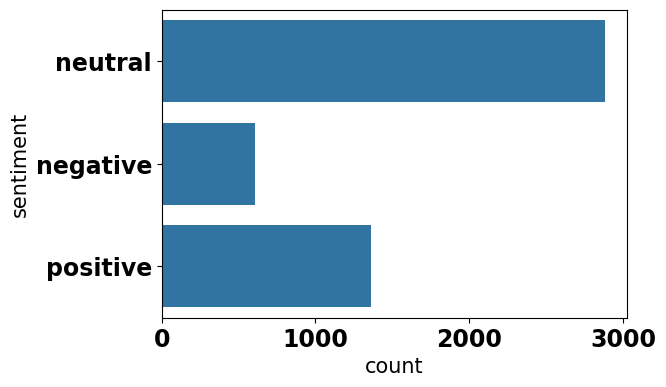

In [ ]:
sns.countplot(y="sentiment",data=df)

In [ ]:
df.isnull().sum()

,0
sentiment,0
news,0


In [ ]:
from textblob import TextBlob

In [ ]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    return ReviewText
df['Review Text'] = preprocess(df['news'])

df['polarity'] = df['news'].map(lambda text: TextBlob(text).sentiment.polarity)
df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [ ]:
df

,sentiment,news,Review Text,polarity,news_len,word_count
0,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,0.083333,190,31
1,negative,The international electronic industry company ...,The international electronic industry company ...,0.000000,228,36
2,positive,With the new production plant the company woul...,With the new production plant the company woul...,-0.064802,206,33
3,positive,According to the company 's updated strategy f...,According to the company 's updated strategy f...,0.000000,203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0.500000,178,25
...,...,...,...,...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.000000,148,30
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 35.4 mn from EUR ...,0.000000,108,23
4843,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,0.040000,226,44
4844,negative,Sales in Finland decreased by 10.5 % in Januar...,Sales in Finland decreased by 10.5 % in Januar...,-0.200000,95,19


In [ ]:
print('top 4 random reviews with the highest positive sentiment polarity: \n')

df1=df.drop_duplicates(subset=['Review Text'])

cl = df1.loc[df1.polarity == 1, ['Review Text']].sample(4).values
for c in cl:
    print(c[0])


top 4 random reviews with the highest positive sentiment polarity: 

Welcome !
While I cant understand what theyre saying , its impressive to watch him hit that ball at those speeds .
`` In terms of profitability and earnings 2007 was the best year in our history , '' Chief Executive Veli-Matti Mattila said .
You are warmly welcome !


In [ ]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl1 = df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for c in cl1:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Risto Raty , Tekla 's executive vice president , said that Tekla Structures and ArchiCAD will cover the entire design and documentation workflow throughout a construction project .
In Sweden , there is an oversupply of pharmacies .
Shuweihat 2 got under way in July 2008 when the project was awarded to desalination and power contractors .
No financial details were disclosed .
LONDON MarketWatch -- Nokia nok said it 's won a five-year services contract to run Hutchison Essar 's network operations in nine locations in India .


In [ ]:
print('5 reviews with the most negative polarity having polarity lesser than -0.80: \n')
cl3 = df.loc[df.polarity <= -0.80, ['Review Text']].sample(5).values
for c in cl3:
    print(c[0])

5 reviews with the most negative polarity having polarity lesser than -0.80: 

There has been some recovery of the base metals prices and increased demand for metals in China , however .
Besides , as there is no depositor preference in Finland , senior debt and deposits rank on a par , which is also taken into consideration , the agency added .
Airvana 's UMTS Home Base Station femto cell uses software-based functionality and off-the-shelf silicon to accelerate feature development and reduce product cost .
Mr Jortikka is president of the base metal division of Outotec Oyj in Finland and is on the executive committee of Outotec .
Capital base and capital adequacy measurement is based on approaches under Basel II .


<Axes: xlabel='polarity'>

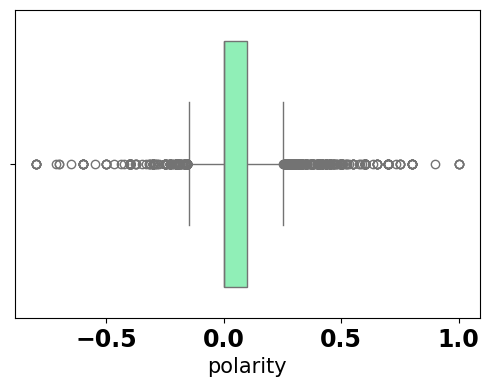

In [ ]:
sns.boxplot(x="polarity", palette="rainbow", data=df)

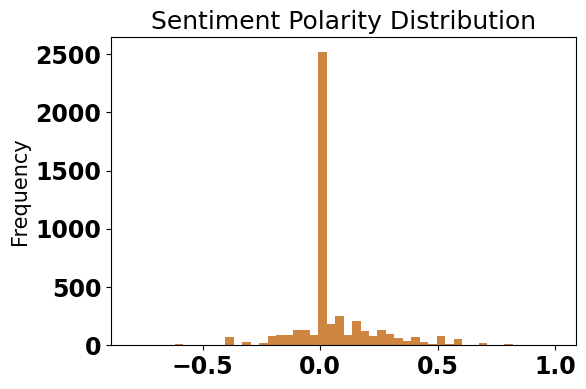

In [ ]:
df['polarity'].plot(
    kind='hist',
    bins=50,
    color="peru",
    title='Sentiment Polarity Distribution');plt.show()

In [ ]:
p_s=df[df["polarity"]>0].count()["sentiment"]
neu_s=df[df["polarity"]==0].count()["sentiment"]
neg_s=df[df["polarity"]<0].count()["sentiment"]

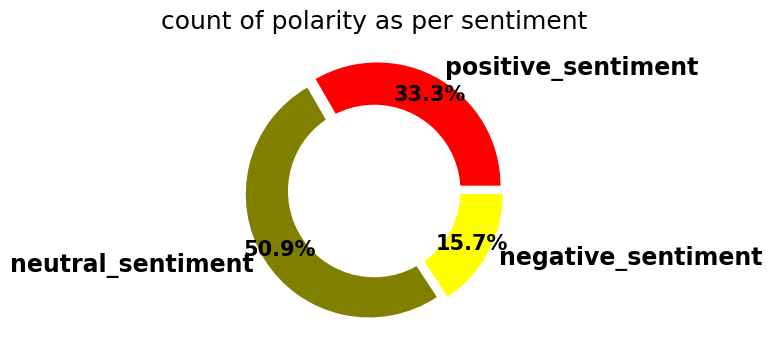

In [ ]:
# Setting labels for items in Chart
sentiment = ['positive_sentiment',"neutral_sentiment","negative_sentiment"]

# Setting size in Chart based on
# given values
values = [p_s,neu_s,neg_s]

# colors
colors = ['#FF0000', 'olive', '#FFFF00']
# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(values, colors=colors, labels=sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('count of polarity as per sentiment')

# Displaing Chart
plt.show()

<Axes: >

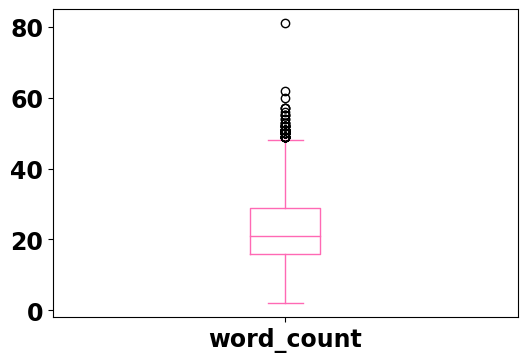

In [ ]:
df.plot.box(y=["word_count"],color="hotpink")

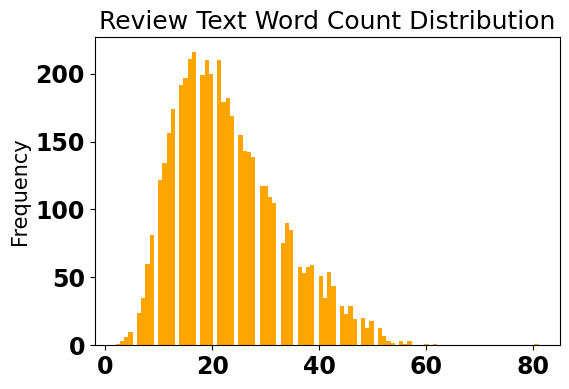

In [ ]:
df['word_count'].plot(
    kind='hist',
    bins=100,
    color="orange",
    title='Review Text Word Count Distribution');plt.show()

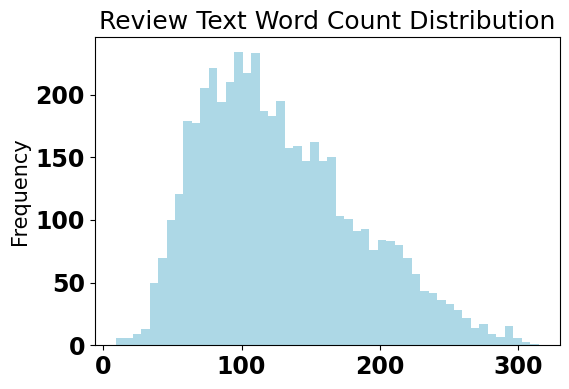

In [ ]:
df['news_len'].plot(
    kind='hist',
    bins=50,
    color="lightblue",
    title='Review Text Word Count Distribution');plt.show()

In [ ]:
fig = px.scatter(df, x="news_len", y="word_count", color="sentiment",
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.show()

the 6069
of 3215
in 2984
and 2596
to 2523
for 1152
eur 1018
is 930
company 851
will 850
from 769
on 727
its 646
has 578
with 573
by 559
said 545
as 544
be 542
finnish 524


,ReviewText,count
0,the,6069
1,of,3215
2,in,2984
3,and,2596
4,to,2523
5,for,1152
6,eur,1018
7,is,930
8,company,851
9,will,850


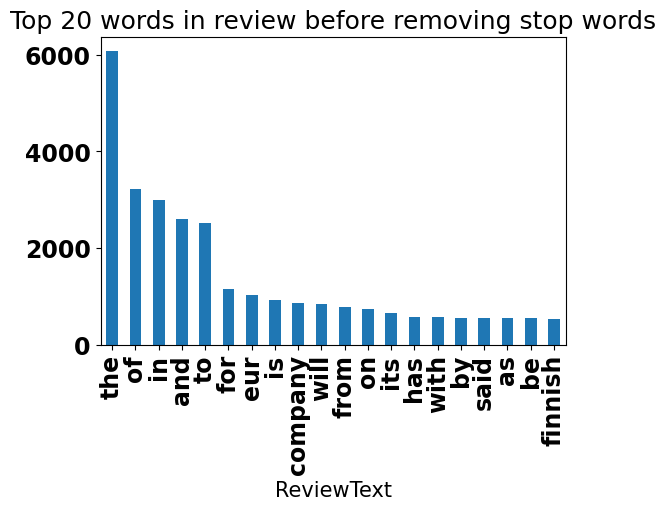

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 words in review before removing stop words')
df1

eur 1018
company 851
said 545
finnish 524
mn 515
sales 455
million 440
net 413
profit 410
year 395
finland 353
group 324
2009 302
operating 299
2008 297
mln 291
new 277
business 270
period 266
quarter 258


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='ReviewText'>

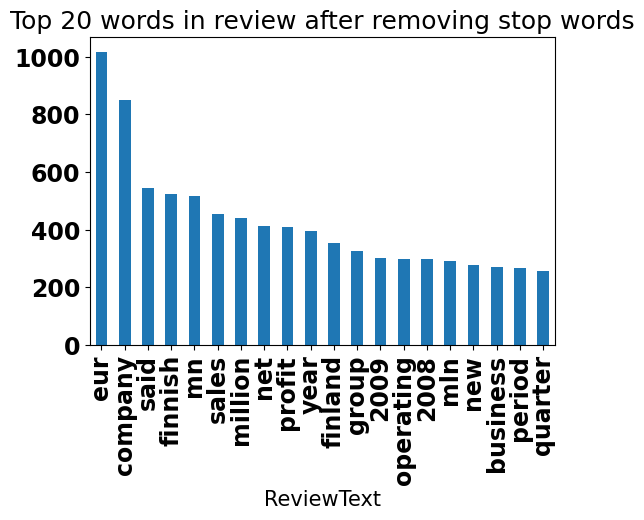

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words in review after removing stop words')

in the 804
of the 719
the company 504
for the 356
will be 272
net sales 246
to the 242
to eur 227
from eur 210
eur mn 196
operating profit 194
mn in 190
and the 182
on the 175
the first 159
quarter of 155
in finland 153
to be 153
of eur 144
at the 125


<Axes: title={'center': 'Top 20 bigrams in review before removing stop words'}, xlabel='ReviewText'>

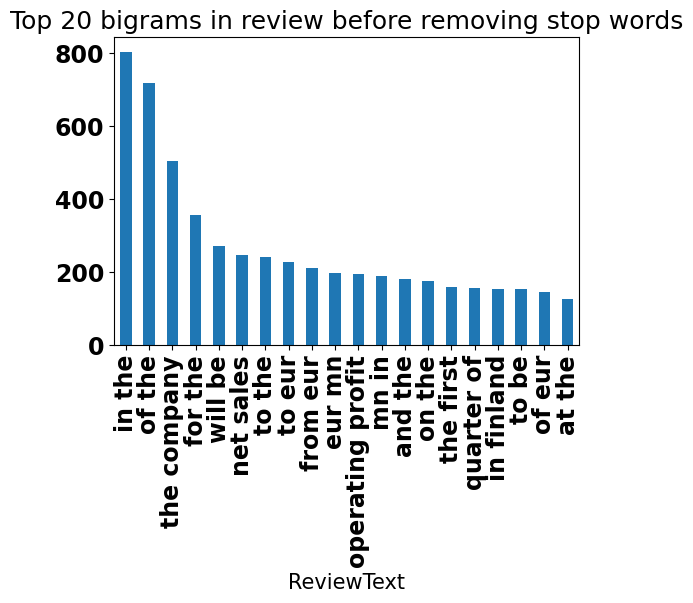

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 bigrams in review before removing stop words')


net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='ReviewText'>

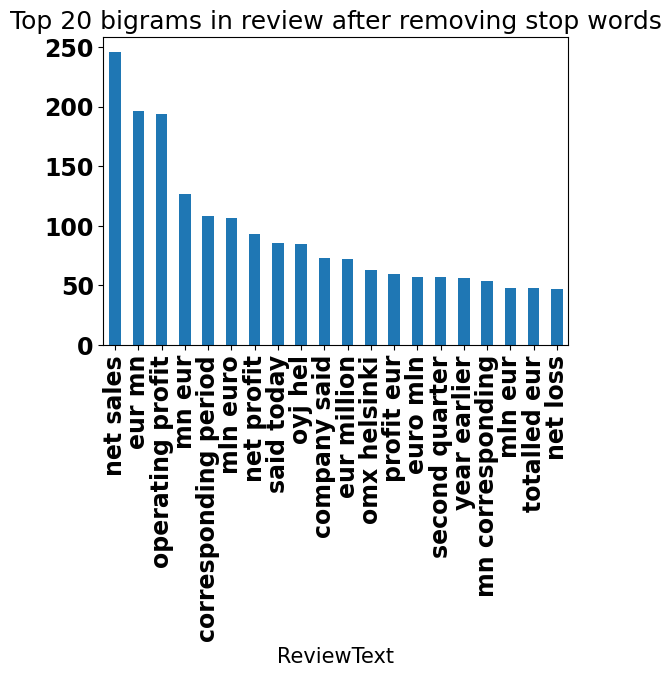

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')


mn in the 120
the corresponding period 108
corresponding period in 87
as well as 82
in the first 76
mn from eur 73
eur mn in 73
in the corresponding 73
the end of 68
net sales of 66
the first quarter 58
the company said 57
the third quarter 53
from eur mn 52
value of the 52
the second quarter 51
mln euro mln 51
the same period 49
in the second 46
first quarter of 44


<Axes: title={'center': 'Top 20 trigrams in review before removing stop words'}, xlabel='ReviewText'>

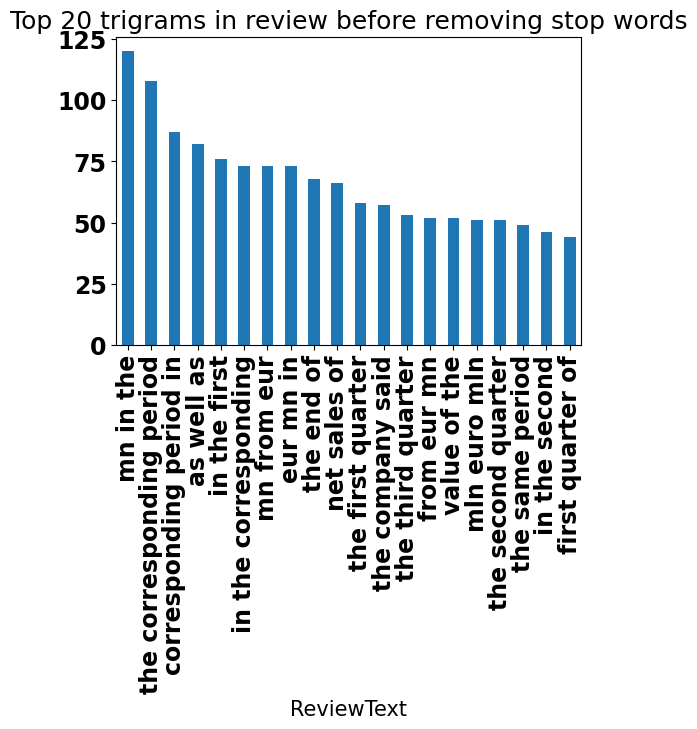

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

mn corresponding period 54
mln euro mln 51
eur mn eur 42
mn eur mn 41
net sales eur 30
profit eur mn 29
profit rose eur 27
earnings share eps 27
said today net 26
eur mn corresponding 25
eur mn compared 25
operating profit eur 24
corresponding period 2005 23
totalled eur mn 23
non recurring items 22
operating profit rose 21
corresponding period 2009 21
stock exchange release 21
net sales increased 20
month period increased 19


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='ReviewText'>

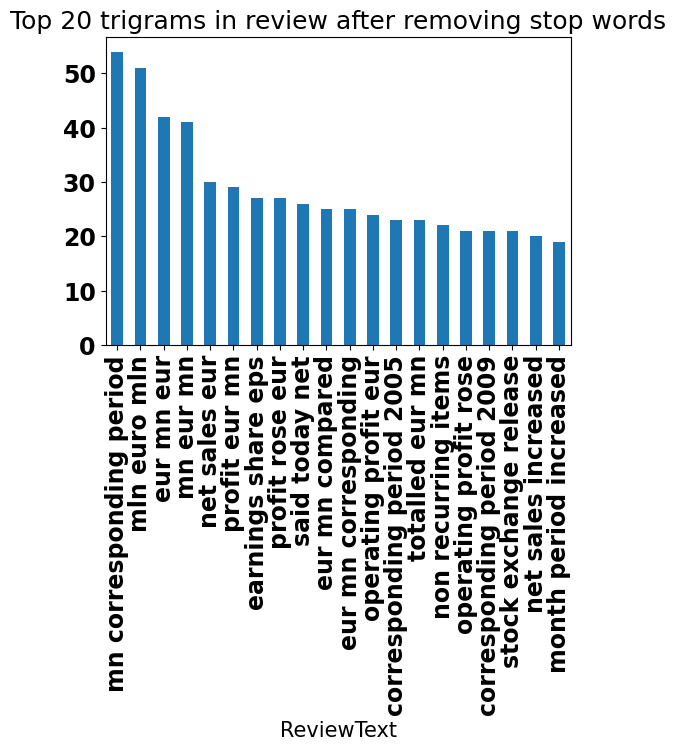

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' ,'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')


In [ ]:
y0 = df.loc[df['sentiment'] == 'positive']['polarity']
y1 = df.loc[df['sentiment'] == 'negative']['polarity']
y2 = df.loc[df['sentiment'] == 'neutral']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Polarity Boxplot according to sentiment"
)

go.Figure(data=data,layout=layout)

In [ ]:
y0 = df.loc[df['sentiment'] == 'positive']['news_len']
y1 = df.loc[df['sentiment'] == 'negative']['news_len']
y2 = df.loc[df['sentiment'] == 'neutral']['news_len']


trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'neutral',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "news length Boxplot by sentiment"
)
go.Figure(data=data,layout=layout)

In [ ]:
xp = df.loc[df['sentiment'] == "positive", 'polarity']
xneu = df.loc[df['sentiment'] == "neutral", 'polarity']
xneg= df.loc[df['sentiment'] == "negative", 'polarity']

trace1 = go.Histogram(
    x=xp, name='positive',
    opacity=0.75
)
trace2 = go.Histogram(
    x=xneu, name = 'neutral',
    opacity=0.75
)
trace3 = go.Histogram(
    x=xneg, name = 'negative',
    opacity=0.75
)
data = [trace1, trace2,trace3]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity')
go.Figure(data=data, layout=layout)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from textblob import TextBlob

# Load dataset from the absolute path
file_path = '/content/drive/MyDrive/Dataset/all-data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Renaming columns for clarity (modify based on actual column names)
data.columns = ['sentiment', 'news']

# Check for missing values and fill them
data = data.dropna()

# Feature Engineering: Calculate Polarity, News Length, and Word Count
data['polarity'] = data['news'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['news_len'] = data['news'].apply(len)
data['word_count'] = data['news'].apply(lambda x: len(x.split()))

# Encode the sentiment labels
le = LabelEncoder()
data['sentiment_encoded'] = le.fit_transform(data['sentiment'])

# Vectorize the news text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(data['news']).toarray()

# Combine text features (TF-IDF) with numerical features (polarity, news_len, word_count)
X = np.hstack((X_text, data[['polarity', 'news_len', 'word_count']].values))
y = data['sentiment_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# --- REGRESSION MODEL ---
# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions and evaluation for regression
y_pred_reg = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error (Regression): {mse}")

# --- KNN MODEL ---
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation for KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")

# --- DECISION TREE MODEL ---
# Train Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Decision Tree): {accuracy_tree}")

Mean Squared Error (Regression): 0.2778691449464997
Accuracy (KNN): 0.5593395252837977
Accuracy (Decision Tree): 0.6480908152734778


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.42      0.43       115
           1       0.73      0.76      0.74       567
           2       0.55      0.53      0.54       287

    accuracy                           0.65       969
   macro avg       0.57      0.57      0.57       969
weighted avg       0.64      0.65      0.65       969

Decision Tree Confusion Matrix:
 [[ 48  36  31]
 [ 46 429  92]
 [ 15 121 151]]


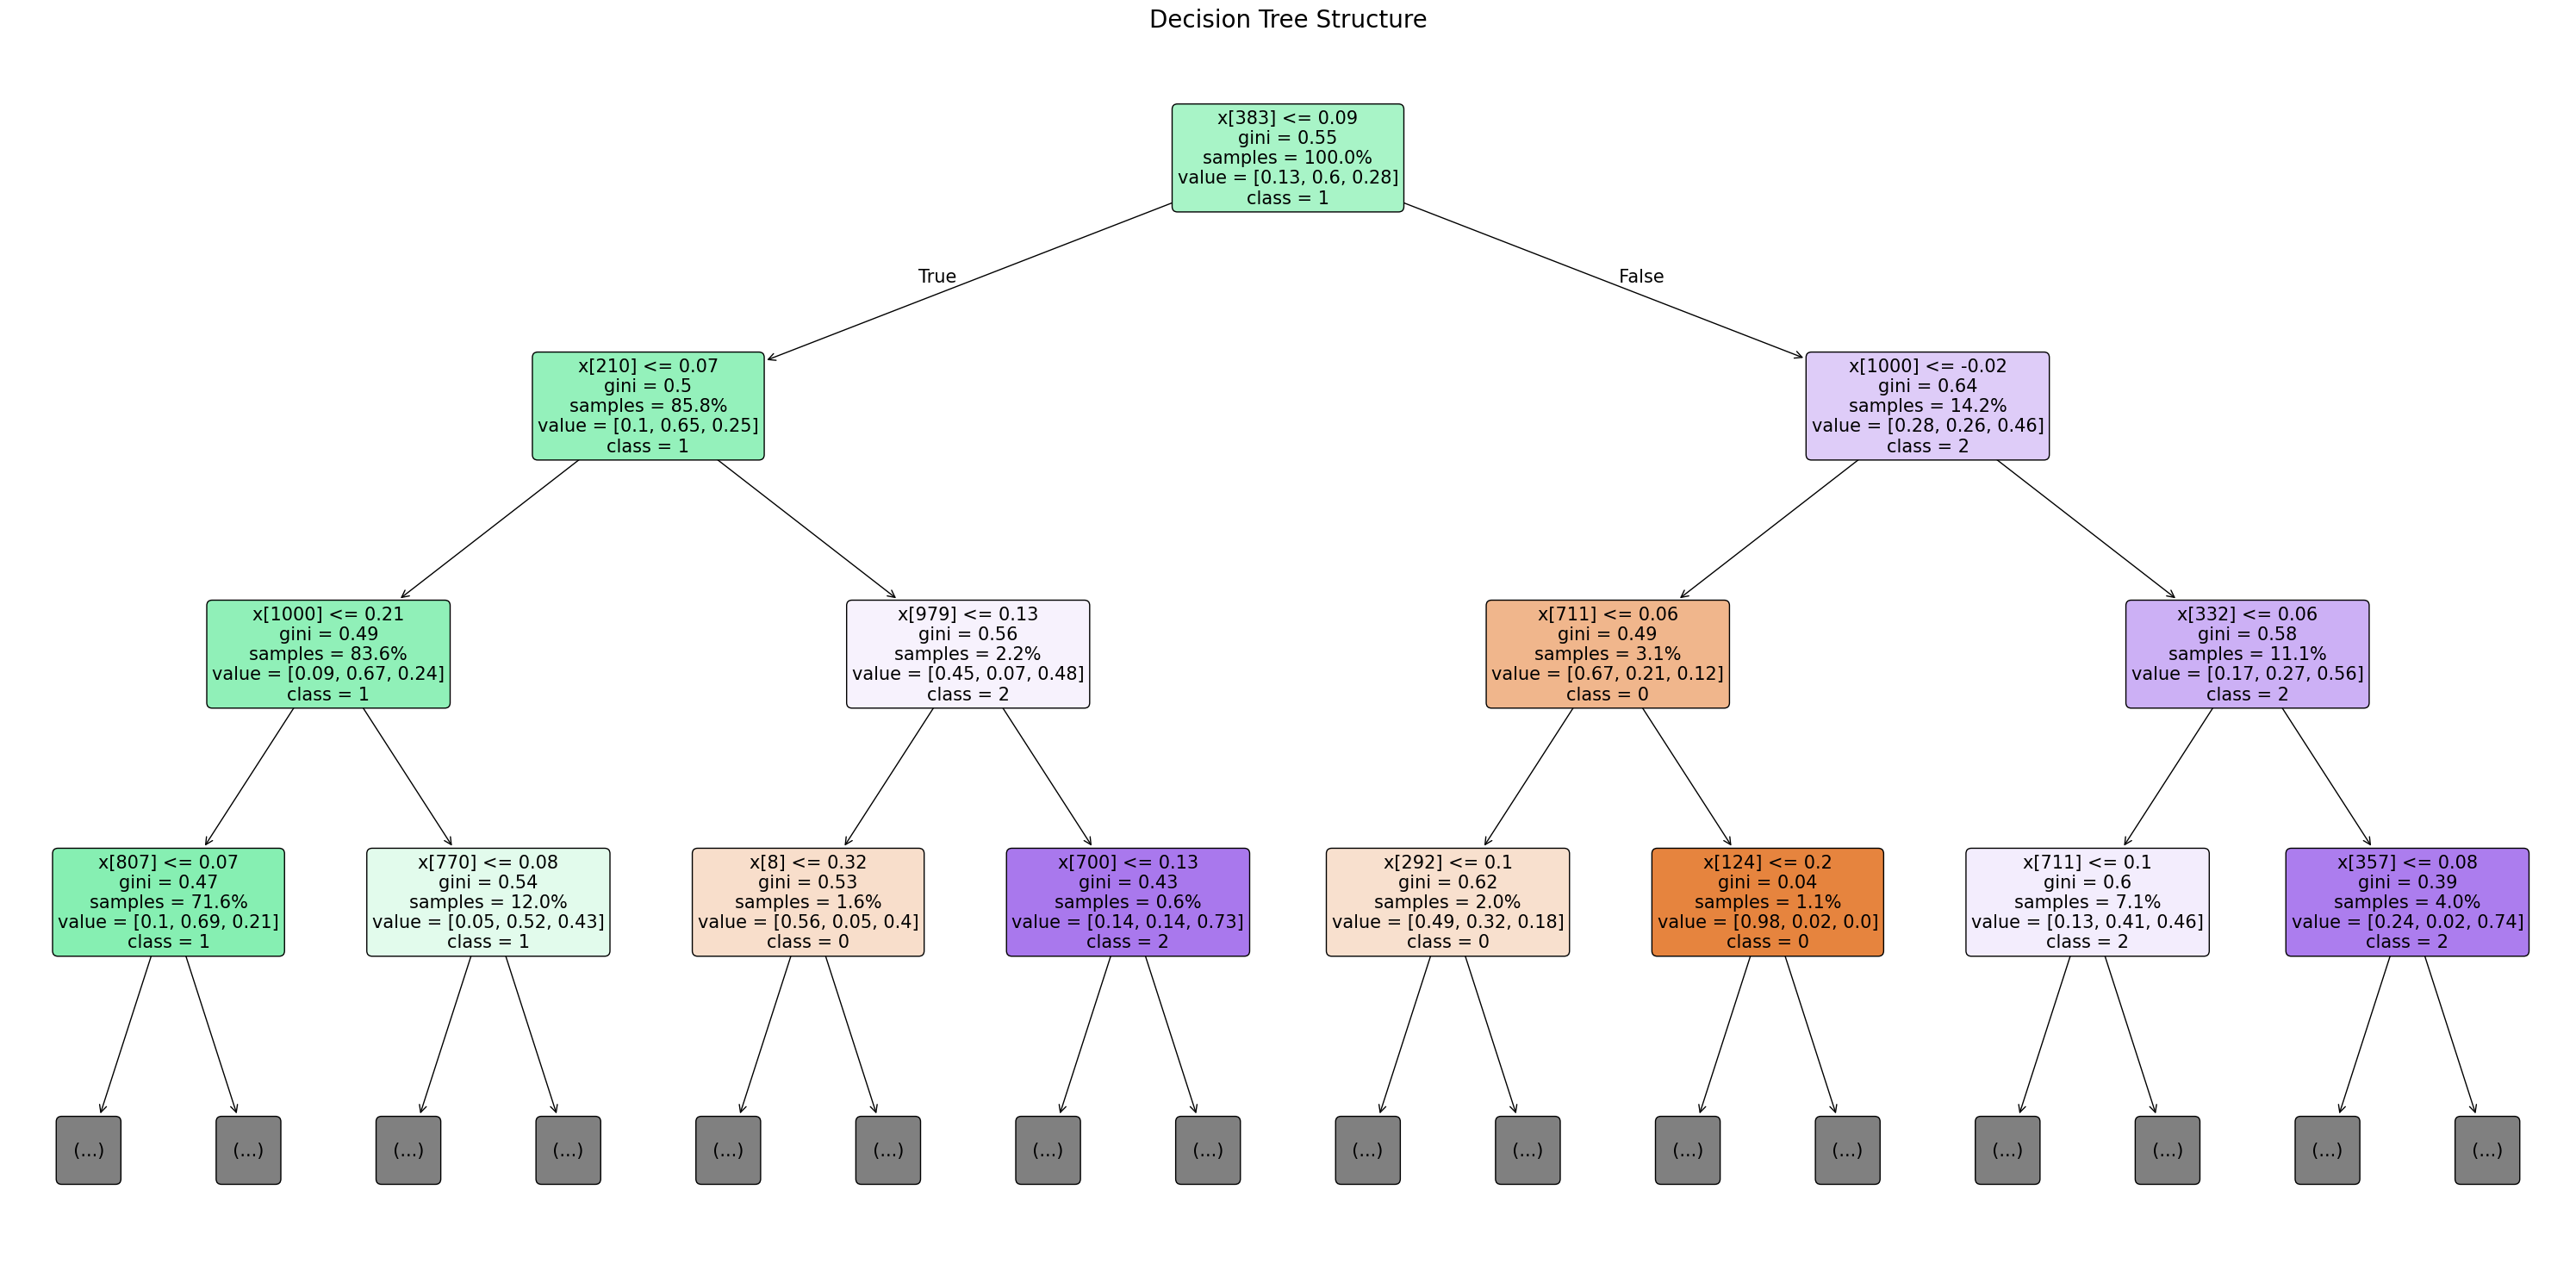

In [17]:
# Decision Tree

# %%
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Print classification report and confusion matrix
print("Decision Tree Classification Report:\n",
      classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_tree))
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np


if hasattr(X_train, 'tocsr'):
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
else:
    feature_names = X_train.columns if hasattr(X_train, 'columns') else None

class_names = [str(name) for name in decision_tree.classes_]

y
plt.figure(figsize=(30, 15))

# Plot the decision tree
plot_tree(
    decision_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=15,
    max_depth=3,
    proportion=True,
    precision=2,
    impurity=True,
    label='all'
)

plt.title('Decision Tree Structure', fontsize=20)
plt.tight_layout()
plt.show()

In [3]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00


In [4]:
import gradio as gr
import pandas as pd
from textblob import TextBlob

In [7]:
# Load the financial news dataset
# Load the financial news dataset, specifying the correct encoding
df = pd.read_csv('/content/drive/MyDrive/Dataset/all-data.csv',
                 encoding='latin-1')  # or 'cp1252'

In [20]:
# Function to analyze sentiment polarity and predict market movement
def predict_market_movement(news_article):
    # Perform sentiment analysis using TextBlob
    sentiment = TextBlob(news_article).sentiment.polarity

    # Predict market movement based on sentiment
    if sentiment > 0:
        return "Market is likely to go UP"
    elif sentiment < 0:
        return "Market is likely to go DOWN"
    else:
        return "Market is likely to remain STABLE"

In [21]:
# Create a simple Gradio interface
# Changed 'gr.inputs.Textbox' to 'gr.Textbox'
iface = gr.Interface(
    fn=predict_market_movement,
    # Updated input declaration
    inputs=gr.Textbox(lines=5, placeholder="Enter financial news article..."),
    outputs="text",
    title="Market Movement Prediction based on Financial News Sentiment",
    description="Input a financial news article, and this tool will predict whether the market will go up, down, or remain stable based on sentiment analysis."
)

# Launch the GUI
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://00a3eba79ffdc5a41f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
